## BIOS 470/570 Lecture 15

## Last time we covered:
* ### NCBI databases [Gene and nucleotide]
* ### The blast algorithm and web interface
* ### Accessing NCBI databases programmatically
* ### Using the BLAST alignment tool programmatically

## Today we will cover:
* ### Introduction to biological imaging
* ### FIJI/ImageJ
* ### Reading and displaying images in python

In [6]:
import numpy as np
from skimage import io, exposure
import matplotlib.pyplot as plt
from matplotlib import animation, rc

# default colormap and figure size
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=(8,8)

#for playing video using matplotlib
rc('animation', html='html5')


In [8]:
img = io.imread('data/stemCellMovie.tif')

In [9]:
img.shape

(67, 368, 378)

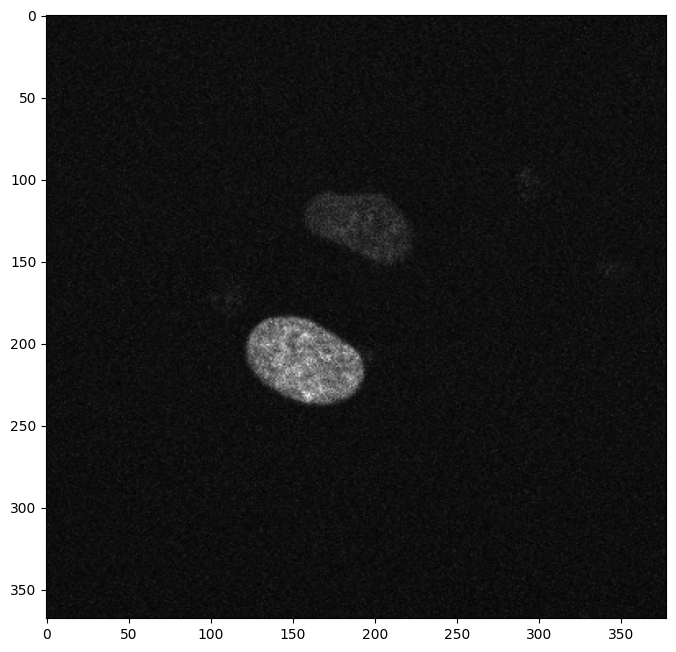

In [27]:
plt.imshow(img[0,:,:]);

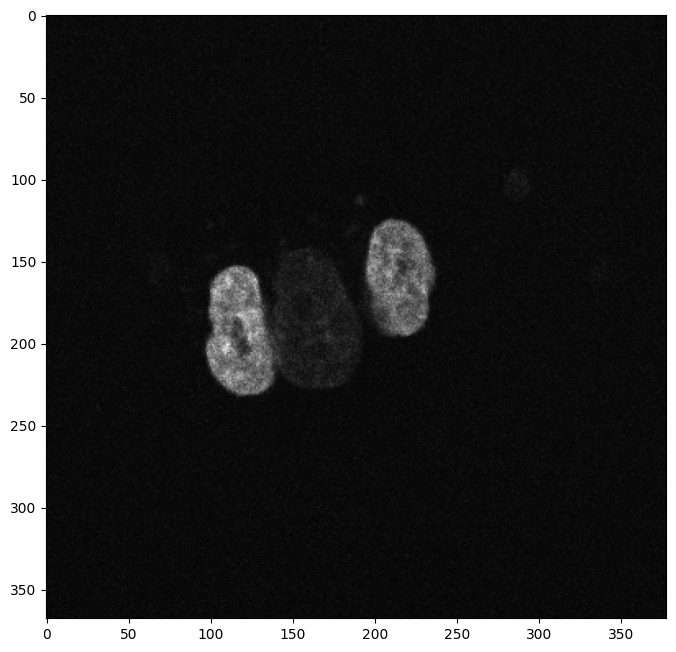

In [28]:
plt.imshow(img[60,:,:]);

In [32]:
print(f'{img.min(),img.max()}')

(391, 13622)


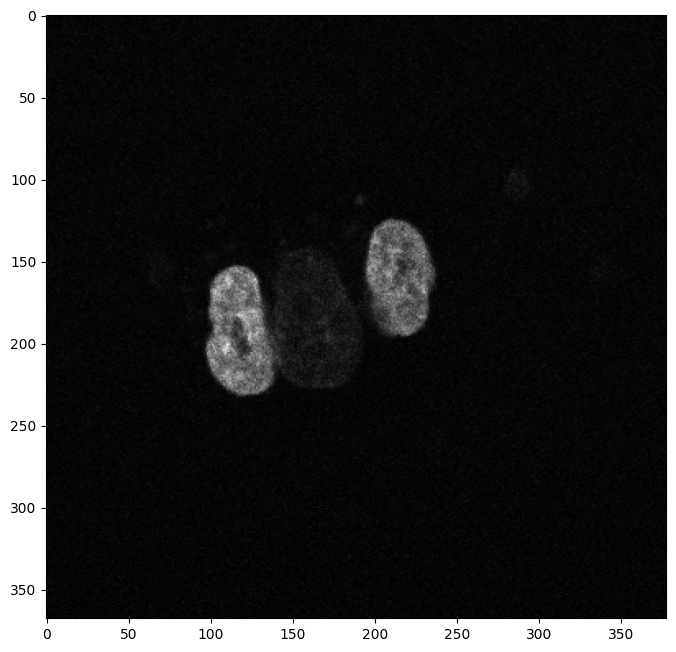

In [35]:
plt.imshow(img[60,:,:],vmin = 500, vmax = 5000);

In [11]:
Imin,Imax = np.percentile(img,(2,98))
print(f'{Imin,Imax}')

(508.0, 1889.0)


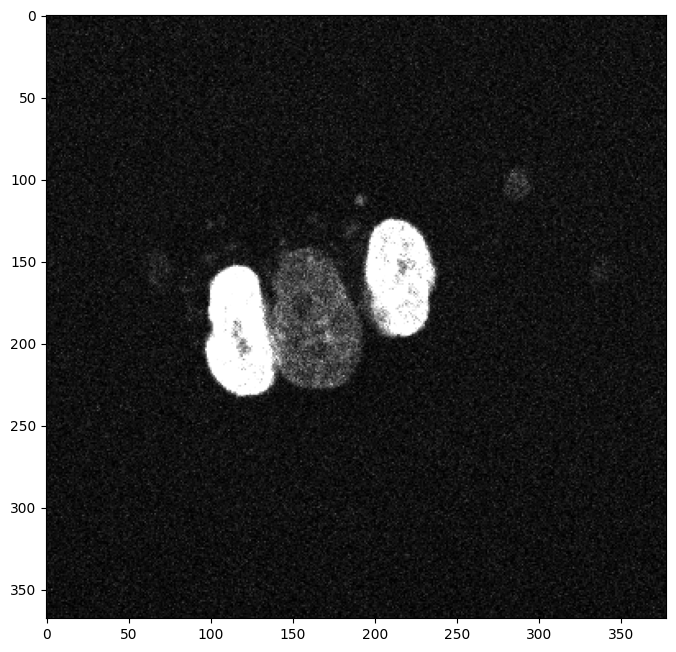

In [12]:
scaled_img60 = exposure.rescale_intensity(img[60,:,:],in_range=(Imin,Imax))
plt.imshow(scaled_img60);

In [13]:
print(f'{scaled_img60.min(),scaled_img60.max()}')

(0, 65535)


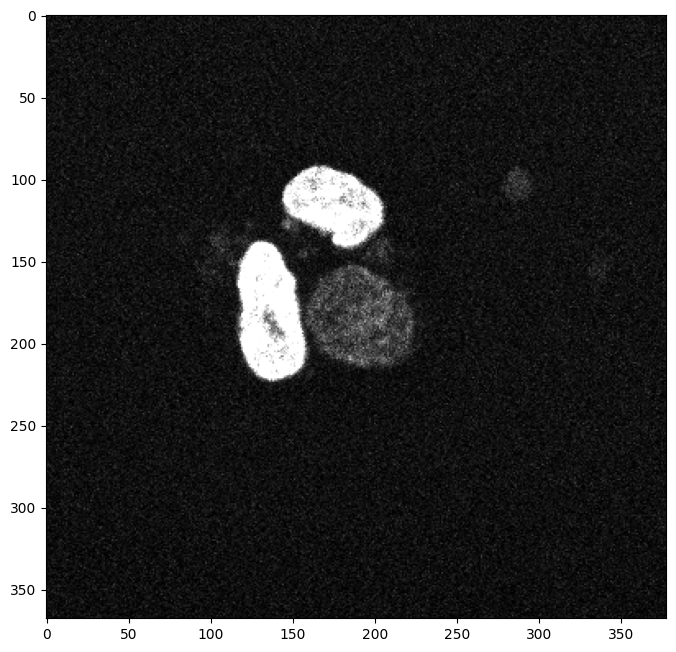

In [15]:
fig, ax = plt.subplots()
ims = []
for i in range(img.shape[0]):
    scaled_img = exposure.rescale_intensity(img[i,:,:],in_range=(Imin,Imax))
    im = ax.imshow(scaled_img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True,
                                repeat_delay=1000)
ani

In [46]:
img.shape[0]

67